In [595]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
np.random.seed(2023)

# Load data
df = pd.read_csv('ford-prices.csv')
df = df.replace({',': ''}, regex=True)
df = df.astype(float)
print(df.head())

     Year  minPrice  maxPrice
0  1992.0    8730.0   14840.0
1  1993.0    8781.0   16535.0
2  1994.0    9449.0   18328.0
3  1995.0   10224.0   19571.0
4  1996.0   10575.0   20295.0


In [596]:
# Split data into features (years) and labels (minimum prices and maximum prices)
X = df.iloc[:,0].values.reshape(-1,1)
y_min = df.iloc[:,1].values.reshape(-1,1)
y_max = df.iloc[:,2].values.reshape(-1,1)


In [597]:
# Initialize theta
theta_min = np.random.rand(2,1)
theta_max = np.random.rand(2,1)

In [598]:
# Define the hypothesis function
def h(X, theta):
    return np.matmul(X, theta)


In [599]:
# Define the mean squared error loss function
def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

In [600]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    loss = np.zeros((num_iters, 1))
    for i in range(num_iters):
        y_hat = h(X, theta)
#         print(y_hat.shape)
        loss[i] = MSE(y, y_hat)
        #print(loss[i])
#         theta = theta + (alpha)/m * np.matmul(X.T, y- y_hat)
        error = y_hat - y
        theta[0] -= alpha * error.mean()
        theta[1] -= alpha * (error * X[:,1:]).mean()
        
    return theta, loss

In [601]:
# Set hyperparameters
alpha = 1e-7
num_iters = 100

In [602]:
# Run gradient descent for minimum prices
theta_min, loss_min = gradient_descent(np.hstack((np.ones((X.shape[0], 1)), X)), y_min, theta_min, alpha, num_iters)

# Run gradient descent for maximum prices
theta_max, loss_max = gradient_descent(np.hstack((np.ones((X.shape[0], 1)), X)), y_max, theta_max, alpha, num_iters)

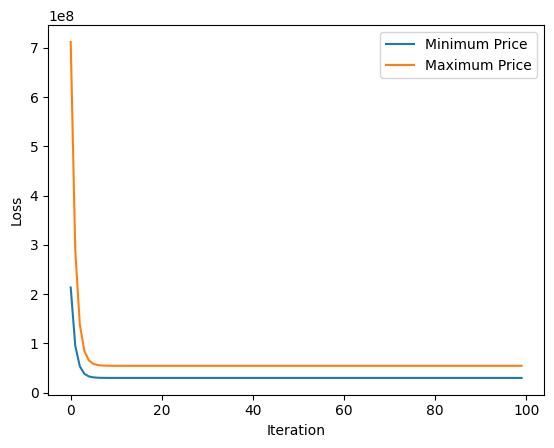

In [603]:
# Plot the loss curve
plt.plot(range(num_iters), loss_min, label='Minimum Price')
plt.plot(range(num_iters), loss_max, label='Maximum Price')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


### predicting the minimum and maximum price of year between 2012 to 2018

In [604]:
prices_min = []
prices_max = []
years = []
for i in range(2012,2019):
    years.append(i)
    prices_min.append(h(np.array([1,i]), theta_min))
    prices_max.append(h(np.array([1,i]), theta_max))


### plotting the Minimum prices of every years

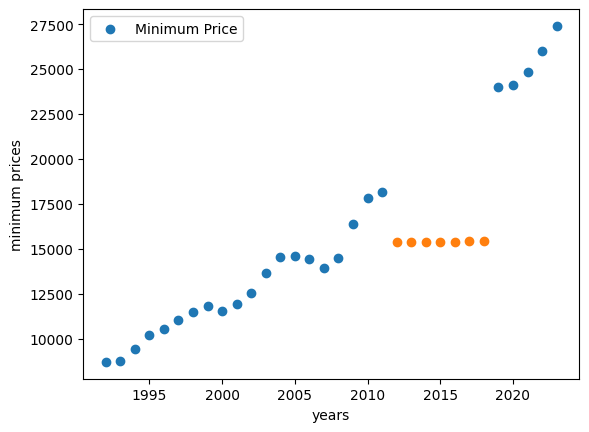

In [605]:
plt.scatter(X, y_min, label='Minimum Price')
plt.scatter(np.array(years),np.array(prices_min))
plt.xlabel('years')
plt.ylabel('minimum prices')
plt.legend()
plt.show()

### plotting the Maximum prices of every years

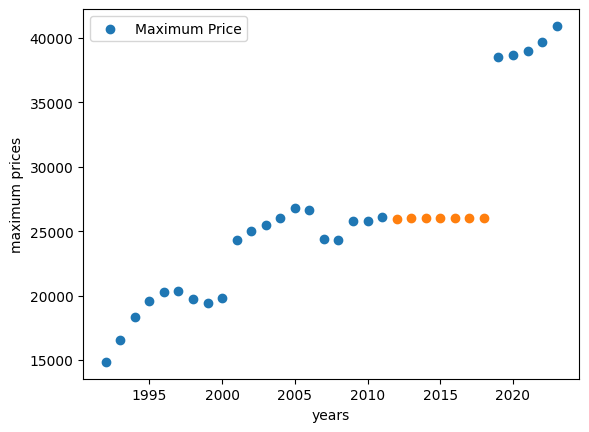

In [606]:
plt.scatter(X, y_max, label='Maximum Price')
plt.scatter(np.array(years),np.array(prices_max))
plt.xlabel('years')
plt.ylabel('maximum prices')
plt.legend()
plt.show()

### dynamic learning rate with feature scaling

In [607]:
X_scaled = (X - X.mean())/(X.max()-X.min())
y_min_scaled = (y_min - y_min.mean())/(y_min.max()-y_min.min())
y_max_scaled = (y_max - y_max.mean())/(y_max.max()-y_max.min())

In [608]:
# Initialize theta
theta_min = np.random.rand(2,1)
theta_max = np.random.rand(2,1)
alpha = 1e-3

In [609]:
def gradient_descent_dynamic(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    loss = np.zeros((num_iters, 1))
    for i in range(num_iters):
        y_hat = h(X, theta)
        loss[i] = MSE(y, y_hat)
        error = y_hat - y
        theta[0] -= alpha * error.mean()
        theta[1] -= (1/(1+i))*alpha * (error * X[:,1:]).mean()
        
    return theta, loss

In [610]:
# Run gradient descent for minimum prices
theta_min, loss_min = gradient_descent_dynamic(np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled)), y_min_scaled, theta_min, alpha, num_iters)

# Run gradient descent for maximum prices
theta_max, loss_max = gradient_descent_dynamic(np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled)), y_max_scaled, theta_max, alpha, num_iters)

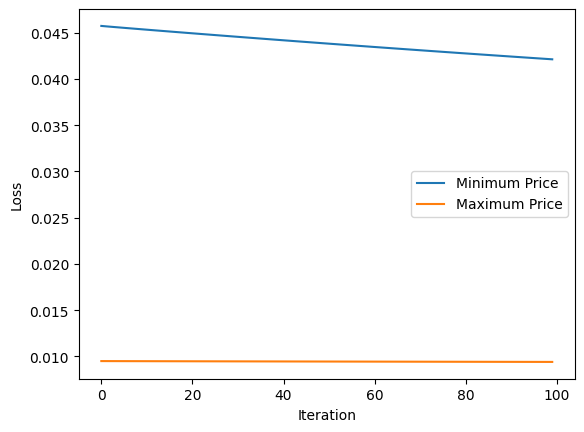

In [611]:
# Plot the loss curve
plt.plot(range(num_iters), loss_min, label='Minimum Price')
plt.plot(range(num_iters), loss_max, label='Maximum Price')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [612]:
prices_min = []
prices_max = []
years = []
for i in range(2012,2019):
    years.append(i)
    prices_min.append(h(np.array([1,(i-X.mean())/(X.max()-X.min())]), theta_min)*(y_min.max()-y_min.min()) + y_min.mean())
    prices_max.append(h(np.array([1,(i-X.mean())/(X.max()-X.min())]), theta_max)*(y_max.max()-y_max.min()) + y_max.mean())

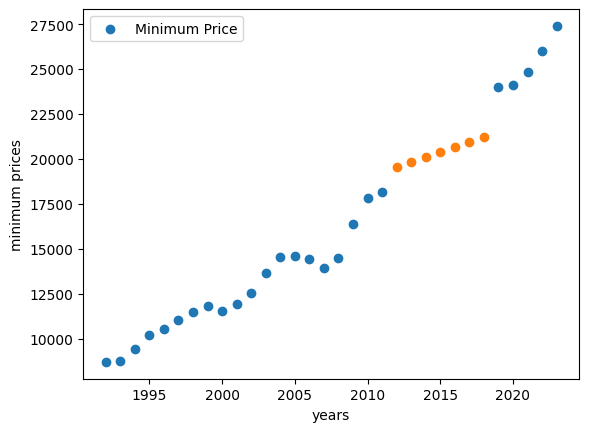

In [613]:
plt.scatter(X, y_min, label='Minimum Price')
plt.scatter(np.array(years),np.array(prices_min))
plt.xlabel('years')
plt.ylabel('minimum prices')
plt.legend()
plt.show()

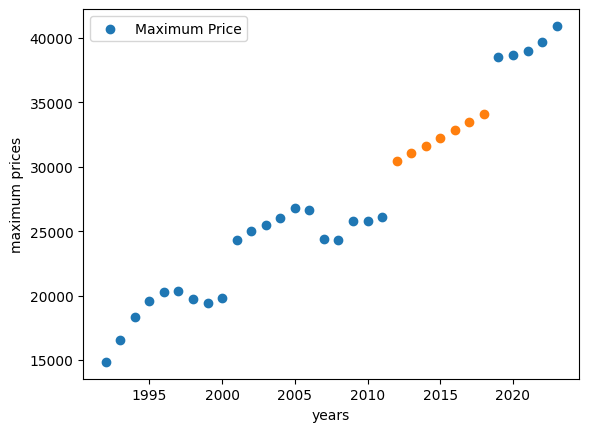

In [614]:
plt.scatter(X, y_max, label='Maximum Price')
plt.scatter(np.array(years),np.array(prices_max))
plt.xlabel('years')
plt.ylabel('maximum prices')
plt.legend()
plt.show()